In [45]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import json
import scipy.special as sps
import scipy.stats as stats
import pylab as pl
import seaborn as sns

In [3]:
import geopandas as gpd
from shapely.geometry import Point

In [6]:
!pip install StringIO

ERROR: Could not find a version that satisfies the requirement StringIO (from versions: none)
ERROR: No matching distribution found for StringIO


In [5]:
from StringIO import StringIO


txt = """dummy, geometry, geometry
1, 2, 3"""

df = pd.read_csv(StringIO(txt), skipinitialspace=True)
df

ModuleNotFoundError: No module named 'StringIO'

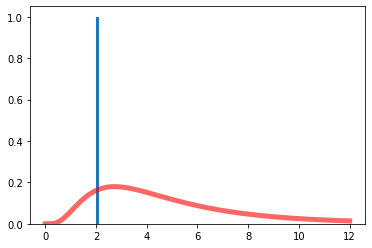

In [92]:
#generate incubation time

fig, ax = plt.subplots(1, 1)
x_plus, s, rate = 12.27, 20.52, 1.59
shape, loc, scale =  (0.6432659248014824, -0.07787673726582335, 4.2489459496009125)
x = np.linspace(0, 12, 1000)
blah = stats.lognorm(s=shape, loc=loc, scale=scale)


ax.plot(x, stats.lognorm.pdf(x, shape, loc, scale),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')
incubation_time = int(np.round(stats.lognorm.rvs(shape, loc, scale, size=1)[0], 0))
plt.hist(incubation_time)
plt.show()
# red: Distribution of incubation time by days
# blue: Randomly generated number of days

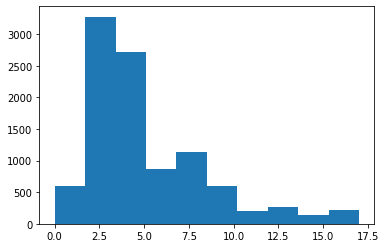

In [93]:
shape, loc, scale =  (0.6432659248014824, -0.07787673726582335, 4.2489459496009125)
x = np.linspace(0, 12, 1000)
out = stats.lognorm.rvs(shape, loc, scale, size=10000)
shmout = np.round(out, 0)
shmout[shmout > 17] = 17
plt.hist(shmout)
plt.show()
# sanity check that values are distributed properly

(array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9., 10., 11., 15.]), array([  2,   4,  11,  27,  85,  98, 134, 138, 127, 111,  94,  64,  45,
        28,  19,   5,   5,   1,   1,   1], dtype=int64))
-3


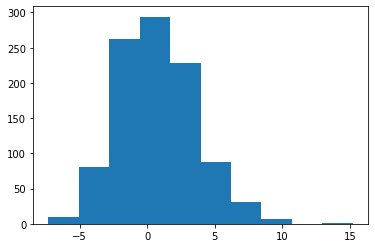

In [94]:
shape, loc, scale = (20.16693271833812, -12.132674385322815, 0.6322296057082886)
gamma = stats.gamma.rvs(shape, loc, scale, size=1000)
output = np.round(gamma, 0)
x = np.linspace(-10, 8, 18)
print(np.unique(output, return_counts=True))
plt.hist(gamma)

# sanity check for gamma distribution

In [88]:
shape, loc, scale = (20.16693271833812, -12.132674385322815, 0.6322296057082886)
x = np.linspace(-10, 8, 19)
y_values = stats.gamma.pdf(x, a=shape, loc=loc, scale=scale)


blah = {'x': list(x), 'gamma': list(stats.gamma.pdf(x, a=shape, loc=loc, scale=scale))}
df = pd.DataFrame(blah)
temp_prob = df[df['x'] == (0-incubation_time)]['gamma'].iloc[0]
print(temp_prob)
infective_prob = np.random.choice ([True, False], p = [temp_prob, 1 - temp_prob])
print(infective_prob)
# generate % of index in a distribution, where index = incubation days
# generate T/F

0.1074580621217082
False
